In [1]:
#Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# CSV data to load in
mouse_drugs = "data/mouse_drug_data.csv"
clinical_trials = "data/clinicaltrial_data.csv"
mouse_drugs_df = pd.read_csv(mouse_drugs)
clinical_trials_df = pd.read_csv(clinical_trials)
# Merge data into dataframe
combined_trial_data_df = pd.merge(clinical_trials_df, mouse_drugs_df, how='outer', on='Mouse ID')
combined_trial_data_df.head() #Preview of combined data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Mean Tumor Volume Data
tumors = combined_trial_data_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']
tumors
tumors_mean = tumors.mean()

mean_tumor_volume_df = pd.DataFrame(tumors_mean)
mean_tumor_volume_df = mean_tumor_volume_df.reset_index()

# Preview of Mean Tumor Volume Data Grouped by Drug and Timepoint
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Standard Error of Tumor Volumes
tumors_sem = tumors.sem()

standard_error_tumor_volume_df = pd.DataFrame(tumors_sem)
standard_error_tumor_volume_df = standard_error_tumor_volume_df.reset_index()

# Preview of Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Breakdown of mean tumor volumes by treatment
reformatted_mean_data_df = pd.pivot_table(mean_tumor_volume_df, values = 'Tumor Volume (mm3)', index=['Timepoint'], columns = 'Drug')
reformatted_mean_data_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Breakdown of standard errors of tumor volumes by treatment
reformatted_sem_data_df = pd.pivot_table(standard_error_tumor_volume_df, values = 'Tumor Volume (mm3)', index=['Timepoint'], columns = 'Drug')
reformatted_sem_data_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


No handles with labels found to put in legend.


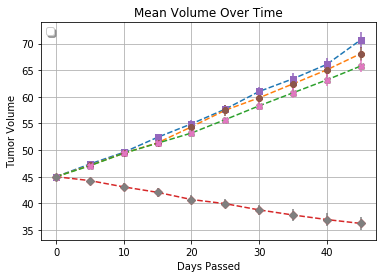

In [6]:
x_axis = list(reformatted_sem_data_df.index)
# Tumor Volume Mean Plots
ketapril_plot = plt.plot(x_axis, reformatted_mean_data_df['Ketapril'], "--", marker="s")
stelasyn_plot = plt.plot(x_axis, reformatted_mean_data_df['Placebo'], "--", marker="8")
infubinol_plot = plt.plot(x_axis, reformatted_mean_data_df['Infubinol'], "--", marker="X")
ramicane_plot = plt.plot(x_axis, reformatted_mean_data_df['Capomulin'], "--", marker="D")
# Legend (w/o error bars)
plt.legend(fancybox=True, framealpha=1, shadow=True, frameon=True, loc="upper left")
# Tumor Volume Error Bars
ketapril_error = plt.errorbar(x_axis, reformatted_mean_data_df['Ketapril'], reformatted_sem_data_df['Ketapril'], fmt="s")
stelasyn_error = plt.errorbar(x_axis, reformatted_mean_data_df['Placebo'], reformatted_sem_data_df['Placebo'], fmt="8")
infubinol_error = plt.errorbar(x_axis, reformatted_mean_data_df['Infubinol'], reformatted_sem_data_df['Infubinol'], fmt="X")
ramicane_plot = plt.errorbar(x_axis, reformatted_mean_data_df['Capomulin'], reformatted_sem_data_df['Capomulin'], fmt="D")
# Graph labels/legend
plt.title("Mean Volume Over Time")
plt.xlabel('Days Passed')
plt.ylabel('Tumor Volume')
plt.grid(True)
# Save the Figure
plt.savefig("data/Mean Volume Over Time.png")
plt.show()


## Metastatic Response to Treatment

In [7]:
# Mean Met. Site Data Grouped by Drug and Timepoint 
metastatics = combined_trial_data_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites']
metastatics_mean = metastatics.mean()

meta_tumor_volume_mean_df = pd.DataFrame(metastatics_mean)
# Preview of Metastatic Means, Grouped by Drug and Timepoint
meta_tumor_volume_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatics_sem = metastatics.sem()

meta_tumor_volume_sem_df = pd.DataFrame(metastatics_sem)
# Preview of Metastatic Standard Errors, Grouped by Drug and Timepoint
meta_tumor_volume_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Breakdown of mean metastatic spreads by treatment
reformatted_meta_mean_data_df = pd.pivot_table(meta_tumor_volume_mean_df, values = 'Metastatic Sites', index=['Timepoint'], columns = 'Drug')
reformatted_meta_mean_data_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
# Breakdown of standard errors of metastatic spreads by treatment
reformatted_meta_sem_data_df = pd.pivot_table(meta_tumor_volume_sem_df, values = 'Metastatic Sites', index=['Timepoint'], columns = 'Drug')
reformatted_meta_sem_data_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


No handles with labels found to put in legend.


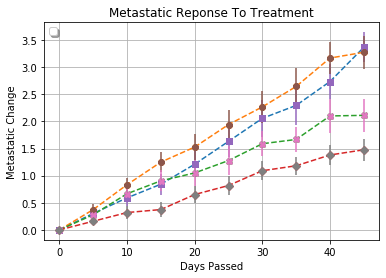

In [11]:
# Means of Metastatic Data Plots
ketapril_meta_plot = plt.plot(x_axis, reformatted_meta_mean_data_df['Ketapril'], "--", marker="s")
stelasyn_meta_plot = plt.plot(x_axis, reformatted_meta_mean_data_df['Placebo'], "--", marker="8")
infubinol_meta_plot = plt.plot(x_axis, reformatted_meta_mean_data_df['Infubinol'], "--", marker="X")
ramicane_meta_plot = plt.plot(x_axis, reformatted_meta_mean_data_df['Capomulin'], "--", marker="D")
# Legend (w/o error bars)
plt.legend(fancybox=True, framealpha=1, shadow=True, frameon=True, loc="upper left")
# Error Bars of Metastatic Data Plots
ketapril_meta_error = plt.errorbar(x_axis, reformatted_meta_mean_data_df['Ketapril'], reformatted_meta_sem_data_df['Ketapril'], fmt="s")
stelasyn_meta_error = plt.errorbar(x_axis, reformatted_meta_mean_data_df['Placebo'], reformatted_meta_sem_data_df['Placebo'], fmt="8")
infubinol_meta_error = plt.errorbar(x_axis, reformatted_meta_mean_data_df['Infubinol'], reformatted_meta_sem_data_df['Infubinol'], fmt="X")
ramicane_meta_plot = plt.errorbar(x_axis, reformatted_meta_mean_data_df['Capomulin'], reformatted_meta_sem_data_df['Capomulin'], fmt="D")
# Graph labels/legend
plt.title("Metastatic Reponse To Treatment")
plt.xlabel('Days Passed')
plt.ylabel('Metastatic Change')
plt.grid(True)
# Save the Figure
plt.savefig("data/Metastatic Response Over Time.png")
plt.show()


## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice = combined_trial_data_df.groupby(['Drug', 'Timepoint'])['Mouse ID']
num_mice = mice.count()

# Convert to DataFrame
mouse_count_pre = pd.DataFrame(num_mice).reset_index()
# Relabel columns(s)
mouse_count_df = mouse_count_pre.rename(columns={"Mouse ID":"Mouse Count"})
# Preview of mouse count survical rates
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Breakdown of mice survival counts by treatment
reformatted_mouse_count_df = pd.pivot_table(mouse_count_df, values = 'Mouse Count', index=['Timepoint'], columns = 'Drug')
reformatted_mouse_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


No handles with labels found to put in legend.


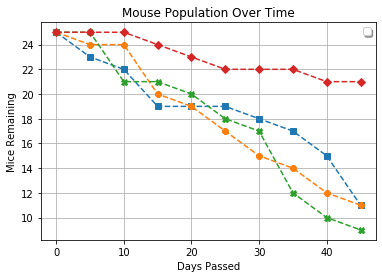

In [14]:
# Generate the Plot (Accounting for percentages)

# Means of Survival Rates Plots
ketapril_survive_plot = plt.plot(x_axis, reformatted_mouse_count_df['Ketapril'], "--", marker="s")
stelasyn_survive_plot = plt.plot(x_axis, reformatted_mouse_count_df['Placebo'], "--", marker="8")
infubinol_survive_plot = plt.plot(x_axis, reformatted_mouse_count_df['Infubinol'], "--", marker="X")
ramicane_survive_plot = plt.plot(x_axis, reformatted_mouse_count_df['Capomulin'], "--", marker="D")
# Legend (w/o error bars)
plt.legend(fancybox=True, framealpha=1, shadow=True, frameon=True, loc="best")

plt.title("Mouse Population Over Time")
plt.xlabel('Days Passed')
plt.ylabel('Mice Remaining')
plt.grid(True)

# Save the Figure
plt.savefig("data/Survival Rates.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
pre_summary_df = pd.pivot_table(mean_tumor_volume_df, values = 'Tumor Volume (mm3)', index=['Drug'], columns = 'Timepoint')

start_volumes = pre_summary_df[0]
end_volumes = pre_summary_df[45]
volume_differences = (end_volumes - start_volumes)/start_volumes

percent_changes = volume_differences*100
# Percent changes in volume, per drug
percent_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

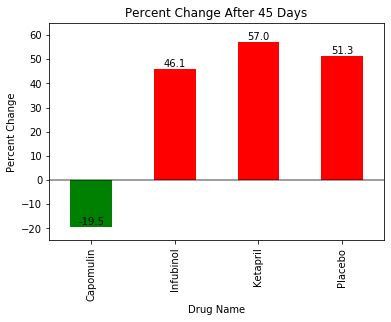

<Figure size 432x288 with 0 Axes>

In [16]:
# Store all Relevant Percent Changes into a Tuple
list_percents = list(zip(percent_changes.index, percent_changes))

list_df = pd.DataFrame(list_percents)
relevant_list_df = list_df.drop([1,4,6,7,8,9])
relevant_list_df.reset_index()

x_drugs = relevant_list_df[0]
y_vals = relevant_list_df[1]
y_nums = y_vals.round(1)
ax = relevant_list_df.plot(kind="bar", x=0, y=1, color=['g', 'r', 'r', 'r'],
                               title="Percent Change After 45 Days",
                               grid=False,
                               legend=False)
# Orient widths. Add labels, tick marks, etc. 
ax.set_xlabel("Drug Name")
ax.set_ylabel("Percent Change")

#LABELS
rects = ax.patches
#labels = ["label%d" % i for i in range(len(rects))]
labels = [y for y in y_nums]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label, ha='center', va='bottom')

plt.hlines(0, -10, 60, alpha=.5)
plt.ylim(-25, 65)
plt.show()
plt.tight_layout()

# Save the Figure
plt.savefig("data/Percent Changes.png")
# Show the Figure
plt.show()

# Observable Trends

1. Capomulin was the most successful of the treatments. Of the four treatments examined, it was the only one to decrease average tumor volume and mice subjected to this drug were much more likely to survive the 45 day trial.

2. The chemical composition of Infubinol is worth studying. While it did not decrease the mean tumor volume in relation to a placebo, mice subjected to this drug were more likely to die during the 45 day study than mice subjected to a placebo. Conversely, tumor volumes of mice taking Infubinol increased at a lower rate than mice taking a placebo.

3. For conclusive metastatic data in the future, a longer study will be needed. For the first month of the study, the error bars overlapped. The results only started to become significant after roughly 40 days. Recommended that future studies last at least 50 days in order to provide more conclusive findings.